## Import Library

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_colwidth', None)  # Show full content in each cell
pd.set_option('display.width', 1000)  # Set max width

## Import dataset

In [2]:
dataset_path = os.getcwd().replace('/notebook' , '') + "/dataset/"

# Read training data
imu_df = pd.read_csv(dataset_path + "imu_data_v2.csv")
imu_df = imu_df.iloc[:,1:]
imu_df.columns = imu_df.columns.str.replace("'" , "")

# Feature Selection

Activity Mapper:

0 : walking
1 : jogging
2 : upstairs
3 : downstairs
4 : sitting
5 : standing
6 : sleeping

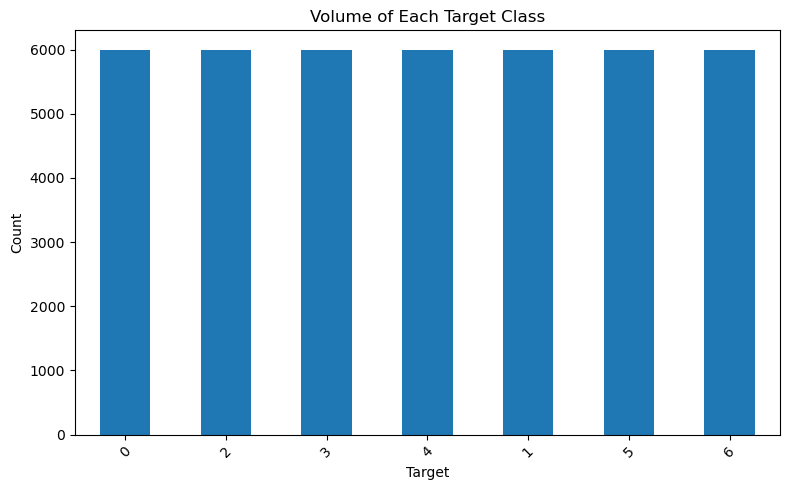

In [3]:
target_counts = imu_df['Target'].value_counts()
target_counts.plot(kind='bar', figsize=(8, 5))

plt.title('Volume of Each Target Class')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Correlation Matrix

## IMU Data

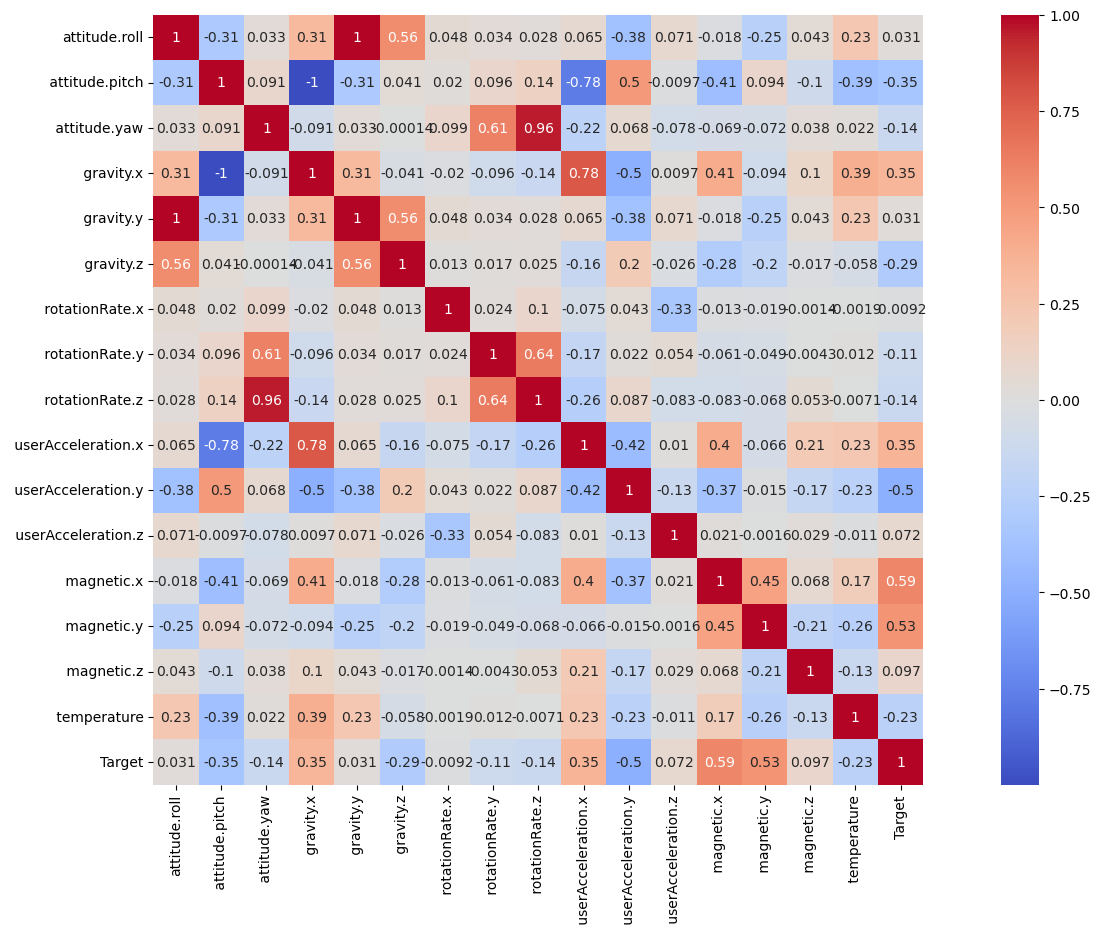

In [4]:
plt.figure(figsize = (20,10))

imu_corr = imu_df.corr()

axis_corr = sns.heatmap(imu_corr, annot= True,cmap="coolwarm",square=True)

plt.show()


In [5]:
target_corr = imu_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 magnetic.x            0.590604
 magnetic.y            0.526482
 userAcceleration.y    0.499548
 userAcceleration.x    0.351848
 gravity.x             0.348636
 attitude.pitch        0.348633
 gravity.z             0.291486
 temperature           0.232933
 rotationRate.z        0.140554
 attitude.yaw          0.135808
 rotationRate.y        0.110990
 magnetic.z            0.096868
 userAcceleration.z    0.071618
 gravity.y             0.030700
attitude.roll          0.030681
 rotationRate.x        0.009230
Name: Target, dtype: float64


Important Features = [attitude.roll , gravity.y , acceleration.x , acceleration.z]

## Motion EDA

In [6]:
"""
Map
0 - steady motion,
1 - unsteady motion
"""
mapper = {
    0 : 1,
    1 : 1,
    2 : 1,
    3 : 1,
    4 : 0,
    5 : 0,
    6 : 0
}

In [7]:
motion_df = imu_df.copy()
motion_df['Target'] = motion_df['Target'].map(mapper)

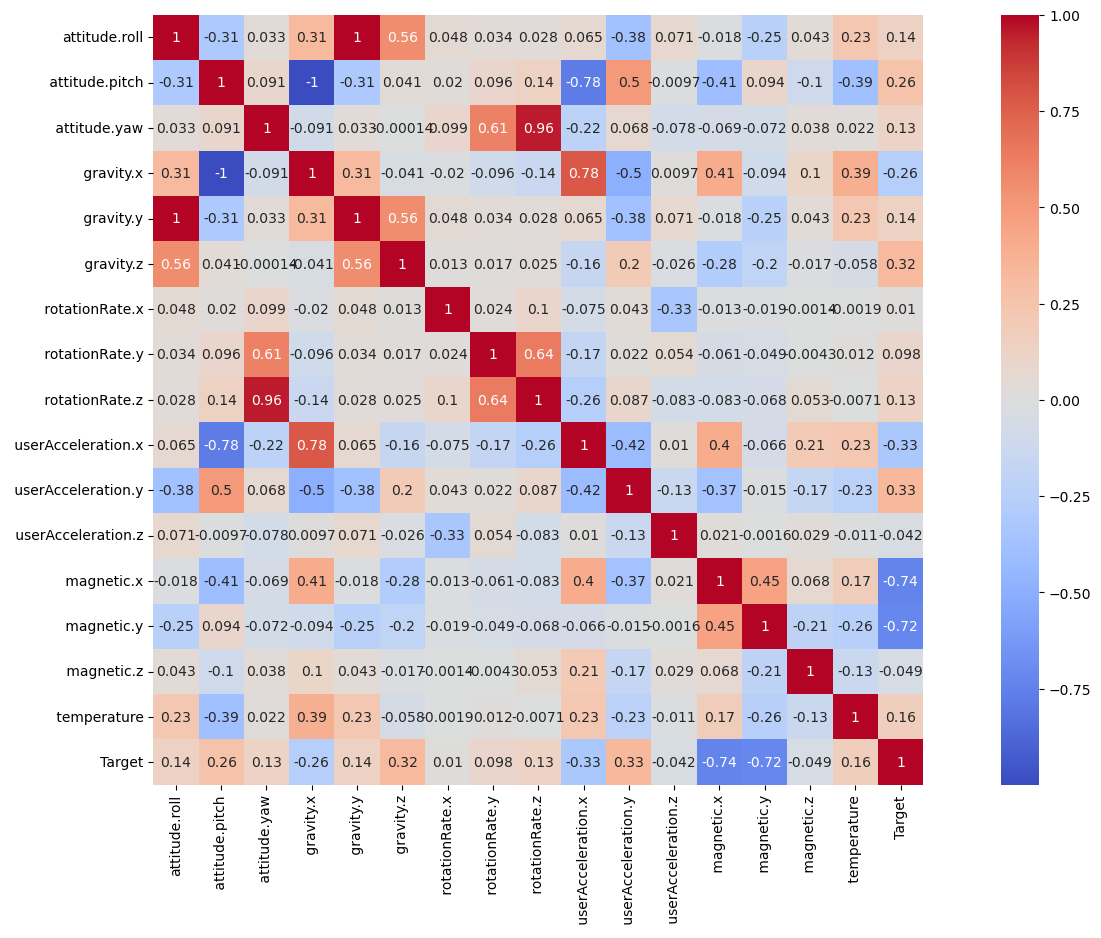

In [8]:
plt.figure(figsize = (20,10))

motion_corr = motion_df.corr()

axis_corr = sns.heatmap(motion_corr, annot= True,cmap="coolwarm",square=True)

plt.show()


In [9]:
target_corr = motion_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 magnetic.x            0.738825
 magnetic.y            0.723788
 userAcceleration.y    0.333735
 userAcceleration.x    0.327896
 gravity.z             0.318865
 gravity.x             0.259662
 attitude.pitch        0.259659
 temperature           0.164097
attitude.roll          0.135137
 gravity.y             0.135127
 rotationRate.z        0.131438
 attitude.yaw          0.126665
 rotationRate.y        0.098317
 magnetic.z            0.048873
 userAcceleration.z    0.042073
 rotationRate.x        0.010265
Name: Target, dtype: float64


Important Features = [attitude.roll , gravity.y , acceleration.z]

## Steady Motion

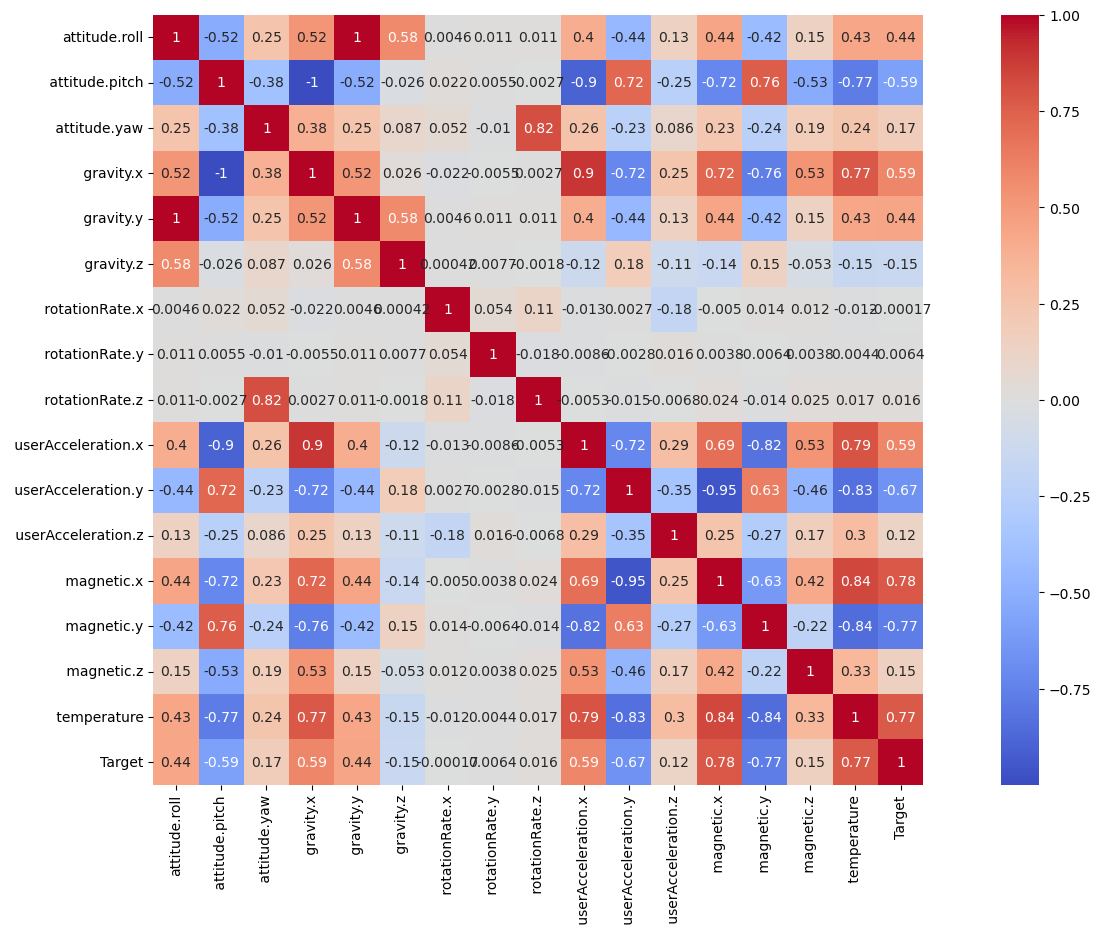

In [10]:
steady_df  =imu_df[(imu_df['Target'] == 4) | (imu_df['Target'] == 5) | (imu_df['Target'] == 6)]

plt.figure(figsize = (20,10))

steady_corr = steady_df.corr()

axis_corr = sns.heatmap(steady_corr, annot= True,cmap="coolwarm",square=True)

plt.show()

In [11]:
target_corr = steady_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 magnetic.x            0.779545
 magnetic.y            0.770643
 temperature           0.769793
 userAcceleration.y    0.666631
 gravity.x             0.590374
 attitude.pitch        0.590367
 userAcceleration.x    0.588648
 gravity.y             0.437511
attitude.roll          0.437476
 attitude.yaw          0.172280
 magnetic.z            0.151636
 gravity.z             0.145107
 userAcceleration.z    0.118025
 rotationRate.z        0.015845
 rotationRate.y        0.006401
 rotationRate.x        0.000172
Name: Target, dtype: float64


Important Feature = [attitude.roll , attitude.pitch , gravity.x , gravity.y , gravity.z]

## Unsteady Motion

In [12]:
"""
Map
0 - surface motion,
1 - staircase motion
"""
mapper = {
    0 : 0,
    1 : 0,
    2 : 1,
    3 : 1
}

unsteady_df  = imu_df[(imu_df['Target'] != 4) & (imu_df['Target'] != 5) & (imu_df['Target'] != 6)]
unsteady_df['Target'] = unsteady_df['Target'].map(mapper)

/var/folders/4f/fqrnlkmx3jl8cj0wlvcm9rgw0000gn/T/ipykernel_67276/2288060464.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unsteady_df['Target'] = unsteady_df['Target'].map(mapper)


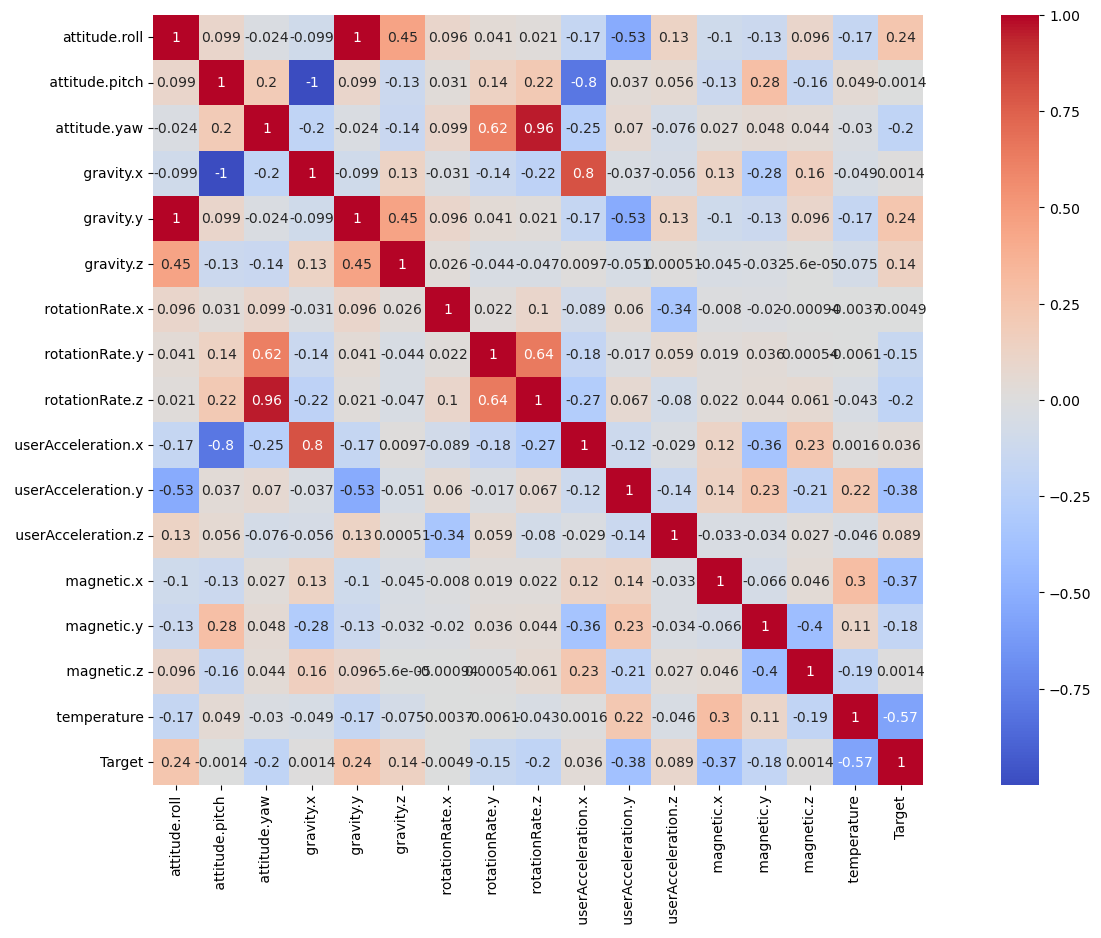

In [13]:
plt.figure(figsize = (20,10))

unsteady_corr = unsteady_df.corr()

axis_corr = sns.heatmap(unsteady_corr, annot= True,cmap="coolwarm",square=True)

plt.show()

In [14]:
target_corr = unsteady_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 temperature           0.572935
 userAcceleration.y    0.376259
 magnetic.x            0.374820
 gravity.y             0.235720
attitude.roll          0.235714
 attitude.yaw          0.199847
 rotationRate.z        0.196327
 magnetic.y            0.180441
 rotationRate.y        0.150313
 gravity.z             0.142595
 userAcceleration.z    0.089026
 userAcceleration.x    0.035854
 rotationRate.x        0.004889
 attitude.pitch        0.001425
 gravity.x             0.001425
 magnetic.z            0.001389
Name: Target, dtype: float64


## Staircase Motion

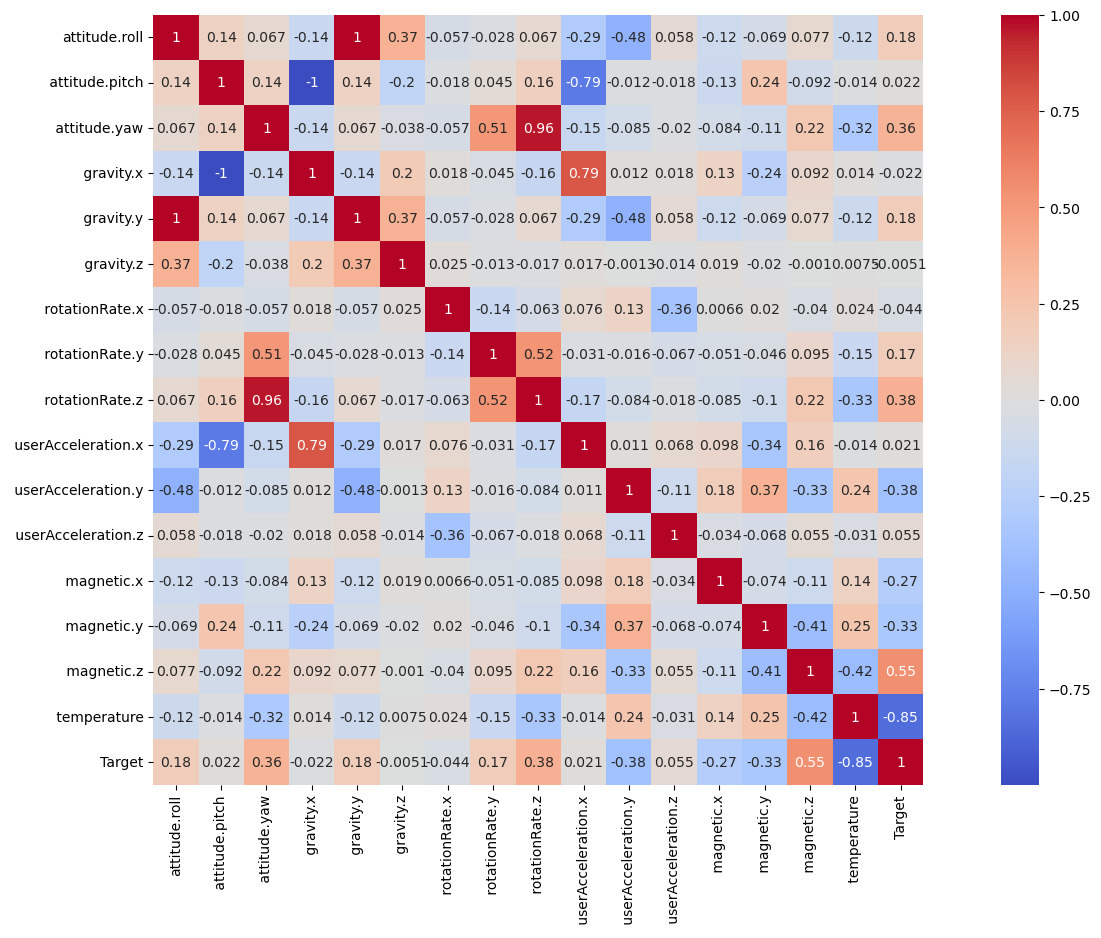

In [15]:
staircase_df  = imu_df[(imu_df['Target'] == 2) | (imu_df['Target'] == 3)]

plt.figure(figsize = (20,10))

staircase_corr = staircase_df.corr()

axis_corr = sns.heatmap(staircase_corr, annot= True,cmap="coolwarm",square=True)

plt.show()

In [16]:
target_corr = staircase_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 temperature           0.849831
 magnetic.z            0.554028
 userAcceleration.y    0.376970
 rotationRate.z        0.375218
 attitude.yaw          0.363710
 magnetic.y            0.327373
 magnetic.x            0.266184
 gravity.y             0.177767
attitude.roll          0.177762
 rotationRate.y        0.173926
 userAcceleration.z    0.055281
 rotationRate.x        0.043879
 attitude.pitch        0.022453
 gravity.x             0.022453
 userAcceleration.x    0.021387
 gravity.z             0.005114
Name: Target, dtype: float64


## Surface Motion

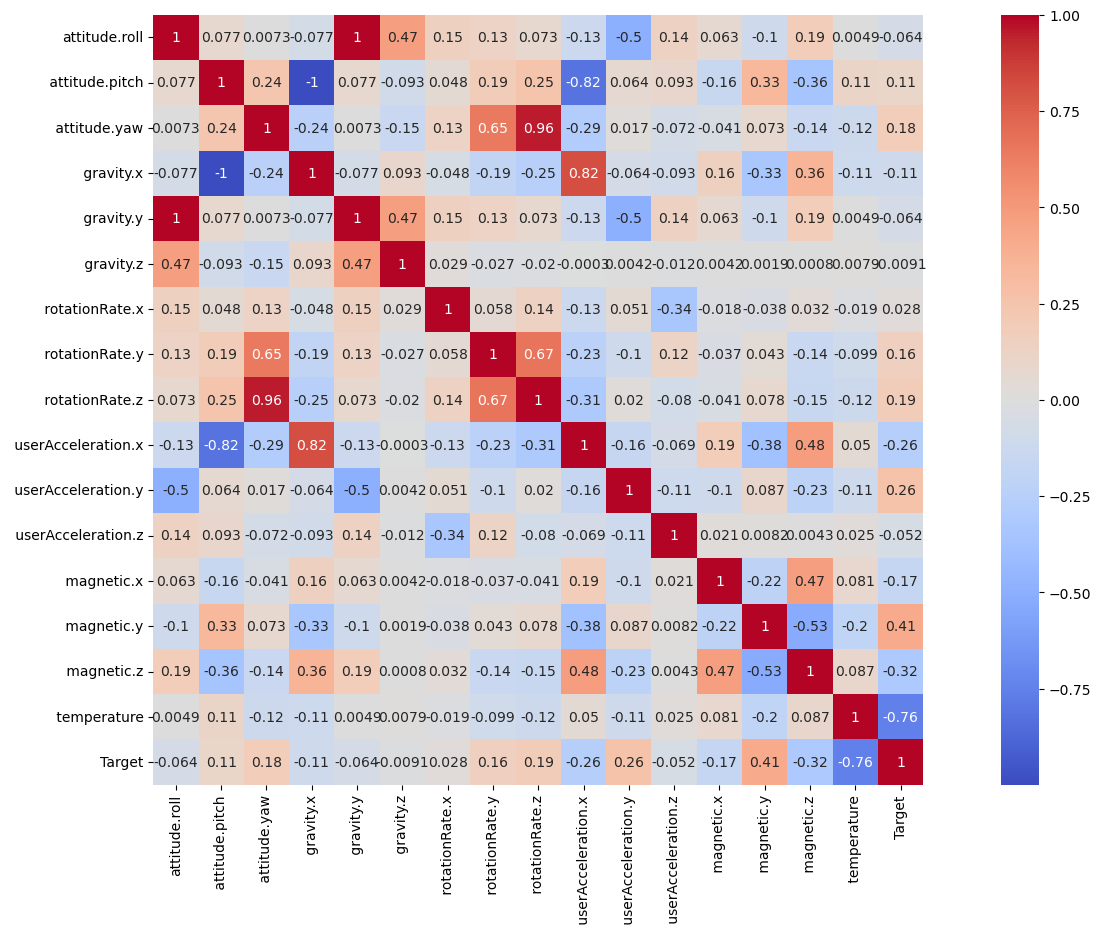

In [17]:
surface_df  = imu_df[(imu_df['Target'] == 0) | (imu_df['Target'] == 1)]

plt.figure(figsize = (20,10))

surface_corr = surface_df.corr()

axis_corr = sns.heatmap(surface_corr, annot= True,cmap="coolwarm",square=True)

plt.show()

In [18]:
target_corr = surface_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 temperature           0.757052
 magnetic.y            0.407990
 magnetic.z            0.317252
 userAcceleration.x    0.260337
 userAcceleration.y    0.259062
 rotationRate.z        0.187571
 attitude.yaw          0.182167
 magnetic.x            0.169414
 rotationRate.y        0.162055
 gravity.x             0.105561
 attitude.pitch        0.105561
 gravity.y             0.063564
attitude.roll          0.063561
 userAcceleration.z    0.051939
 rotationRate.x        0.027544
 gravity.z             0.009084
Name: Target, dtype: float64
